<h3> Primeiramente vamos importar as bibliotecas relevantes para esse exercício</h3>

In [1]:
import numpy as np
import pickle
import gzip
import NN2
import matplotlib.pyplot as plt

<h3>Vamos definir uma função para ver um determinado dado na tabela e seu label</h3>

In [2]:
def view(data, index):
    values = data[0][index]
    result = data[1][index]
    z = np.reshape(values,(28,28))
    plt.imshow(z)
    plt.gray()
    plt.show()
    print(f'O rótulo para esse dado é ==> {result}')

<h3> Agora vamos determinar umas funções para organizar os dados em um formato que possamos usar na nossa rede neural</h3>

In [3]:
def data_format(data, vectorize = False):
    inputs = [x.reshape(784,1) for x in data[0]]
    results = data[1]
    return inputs, results

<h3>Lê o dataset</h3>

In [4]:
file = gzip.open('mnist.pkl.gz', 'rb')
training, validation, test_data = pickle.load(file, encoding='latin1')
file.close()

<h3>Formata os datasets e cria um dataset de treino mais curto</h3>

In [5]:
x, y = data_format(training, True)
vx, vy = data_format(validation)
tx, ty = data_format(test_data)
x_short = x[:100]
y_short = y[:100]

<h3>Vamos criar 3 redes neurais. Duas iguais com apenas uma camada escondida. Uma delas será treinada com todo dataset de treino e a outra, com o dataset menor. A terceira rede é uma rede profunda, com muitas camadas escondidas e também será treinada com o dataset menor</h3>

In [6]:
nn1 = NN2.neuralnet([784,30,10])
nn2 = NN2.neuralnet([784,30,10])
nn3 = NN2.neuralnet([784,20,20,20,20,10])

<h3>Treinando as redes</h3>

In [7]:
nn1.fit(x, y, 10, 100, 3.0, tx, ty)

... 1... 2... 3... 4... 5... 6... 7... 8... 9... 10

In [8]:
nn2.fit(x_short, y_short, 100, 10, 3.0, tx, ty)

... 1... 2... 3... 4... 5... 6... 7... 8... 9... 10... 11... 12... 13... 14... 15... 16... 17... 18... 19... 20... 21... 22... 23... 24... 25... 26... 27... 28... 29... 30... 31... 32... 33... 34... 35... 36... 37... 38... 39... 40... 41... 42... 43... 44... 45... 46... 47... 48... 49... 50... 51... 52... 53... 54... 55... 56... 57... 58... 59... 60... 61... 62... 63... 64... 65... 66... 67... 68... 69... 70... 71... 72... 73... 74... 75... 76... 77... 78... 79... 80... 81... 82... 83... 84... 85... 86... 87... 88... 89... 90... 91... 92... 93... 94... 95... 96... 97... 98... 99... 100

In [9]:
nn3.fit(x_short, y_short, 100, 10, 3.0, tx, ty)

... 1... 2... 3... 4... 5... 6... 7... 8... 9... 10... 11... 12... 13... 14... 15... 16... 17... 18... 19... 20... 21... 22... 23... 24... 25... 26... 27... 28... 29... 30... 31... 32... 33... 34... 35... 36... 37... 38... 39... 40... 41... 42... 43... 44... 45... 46... 47... 48... 49... 50... 51... 52... 53... 54... 55... 56... 57... 58... 59... 60... 61... 62... 63... 64... 65... 66... 67... 68... 69... 70... 71... 72... 73... 74... 75... 76... 77... 78... 79... 80... 81... 82... 83... 84... 85... 86... 87... 88... 89... 90... 91... 92... 93... 94... 95... 96... 97... 98... 99... 100

<h3>Vendo algumas métricas de como o treinamento progrediu para cada rede com base no nosso critério de escolha de decisão</h3>

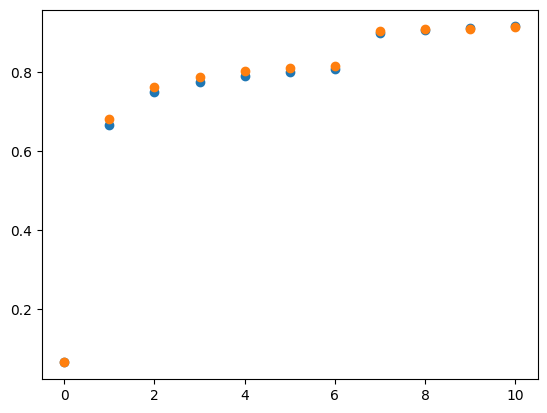

In [10]:
fig = nn1.plot()

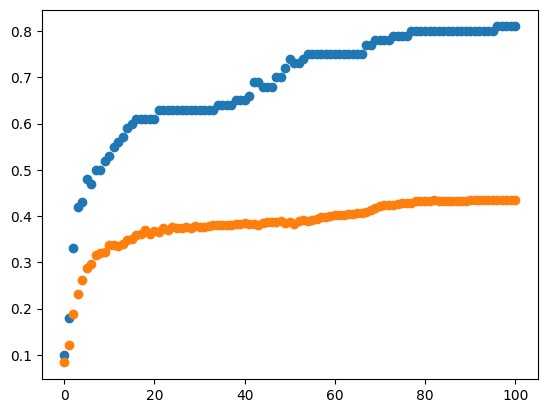

In [11]:
fig = nn2.plot()

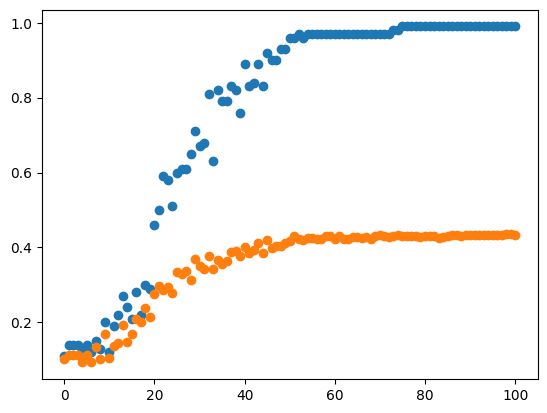

In [12]:
fig = nn3.plot()

<h3>Fazendo a rede tomar uma decisão com base em algum evento de validação</h3>

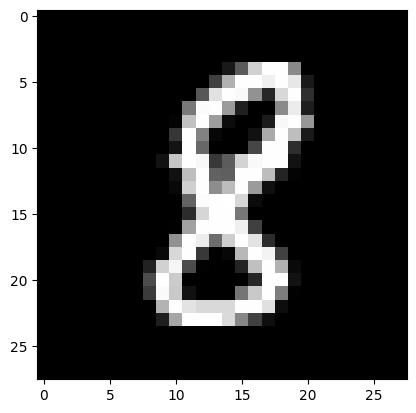

O rótulo para esse dado é ==> 8


In [13]:
index = 1007
view(validation,index)

In [14]:
nn1.output(vx[index])

array([[2.07119800e-05],
       [1.41433692e-03],
       [9.47793983e-04],
       [1.06047832e-02],
       [1.70331441e-04],
       [2.02538167e-02],
       [1.10814608e-03],
       [8.17490624e-05],
       [9.96248724e-01],
       [3.95307195e-04]])

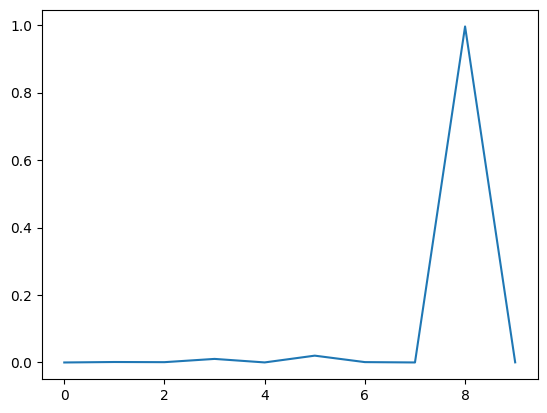

In [15]:
plt.plot(nn1.output(vx[index]))

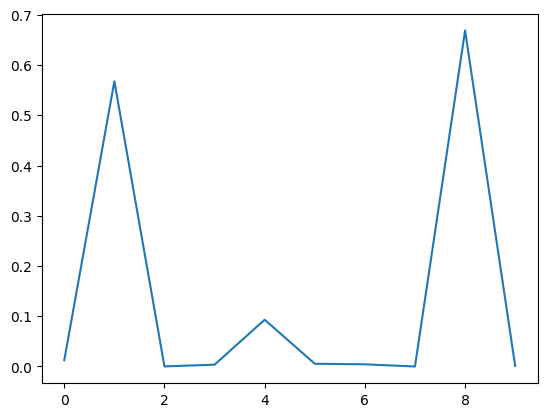

In [16]:
plt.plot(nn2.output(vx[index]))

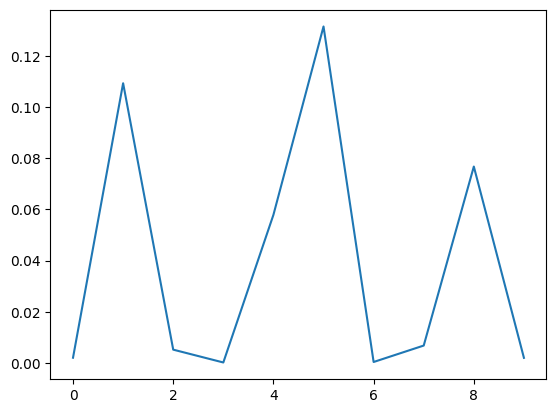

In [17]:
plt.plot(nn3.output(vx[index]))

<h3>Aqui é para mostrar como a rede performa para ruído.</h3>
<h4>Ela não foi treinada paa ruído. Não sabe nada sobre isso. Vai tomar uma decisão baseada apenas nos dados que ele foi treinada e no que aprendeu com eles. Você pode estar se perguntando, então, o que ela aprendeu? Aprendeu a reconhecer padrões ou só encontrou um mapa de transferência entre input e output?</h4>

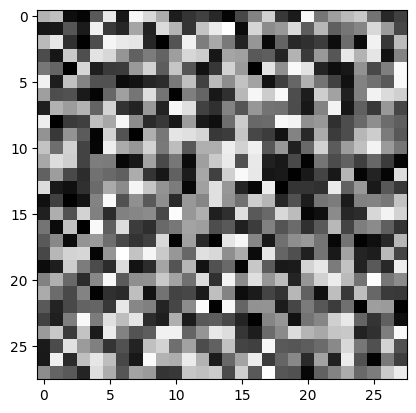

In [30]:
r = np.random.rand(784,1)
z = np.reshape(r,(28,28))
plt.imshow(z)
plt.gray()
plt.show()

<h3>Saída da rede NN1, treinada com todo dataset de treino, para esse ruído</h3>

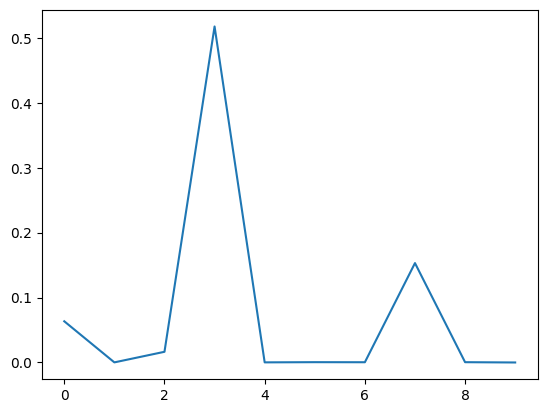

In [31]:
plt.plot(nn1.output(r))

<h3>Agora vamos fazer isso no SCIKIT-LEARN</h3>

In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
X = training[0]
Y = training[1]

In [22]:
clf = MLPClassifier(hidden_layer_sizes=(30), activation = 'logistic', solver='sgd',  batch_size=100)

In [23]:
X_test = test_data[0]
Y_test = test_data[1]

In [24]:
max_epochs = 100
score_train = [0]
score_test = [0]

In [25]:
for epoch in range(max_epochs):
    clf.partial_fit(X,Y, classes = np.unique(Y))
    score_train.append(clf.score(X, Y))
    score_test.append(clf.score(X_test, Y_test))
    print("... {}".format(epoch+1), end="")
    

... 1... 2... 3... 4... 5... 6... 7... 8... 9... 10... 11... 12... 13... 14... 15... 16... 17... 18... 19... 20... 21... 22... 23... 24... 25... 26... 27... 28... 29... 30... 31... 32... 33... 34... 35... 36... 37... 38... 39... 40... 41... 42... 43... 44... 45... 46... 47... 48... 49... 50... 51... 52... 53... 54... 55... 56... 57... 58... 59... 60... 61... 62... 63... 64... 65... 66... 67... 68... 69... 70... 71... 72... 73... 74... 75... 76... 77... 78... 79... 80... 81... 82... 83... 84... 85... 86... 87... 88... 89... 90... 91... 92... 93... 94... 95... 96... 97... 98... 99... 100

In [26]:
print(f'Train Accuracy = {clf.score(X, Y)}')
print(f'Test Accuracy = {clf.score(X_test, Y_test)}')
print("Número de epochs : ", clf.n_iter_)
print("Número de camadas : ", clf.n_layers_)
print("Número de outputs : ", clf.n_outputs_)

Train Accuracy = 0.93122
Test Accuracy = 0.9317
Número de epochs :  1
Número de camadas :  3
Número de outputs :  10


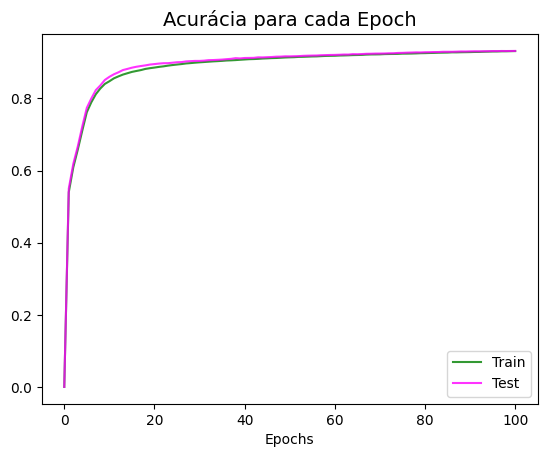

In [27]:
plt.plot(score_train, color='green', alpha=0.8, label='Train')
plt.plot(score_test, color='magenta', alpha=0.8, label='Test')
plt.title("Acurácia para cada Epoch", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()

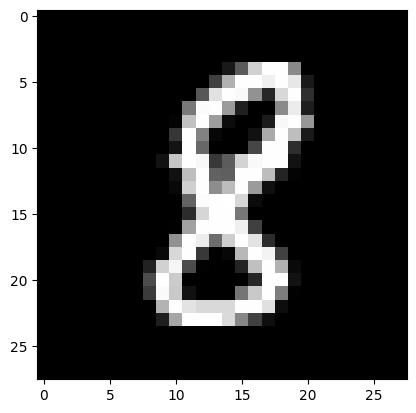

O rótulo para esse dado é ==> 8


In [28]:
index = 1007
P = [validation[0][index]]
V = [validation[1][index]]
VP = clf.predict(P)
view(validation, index)

O valor predito pela rede é: 8


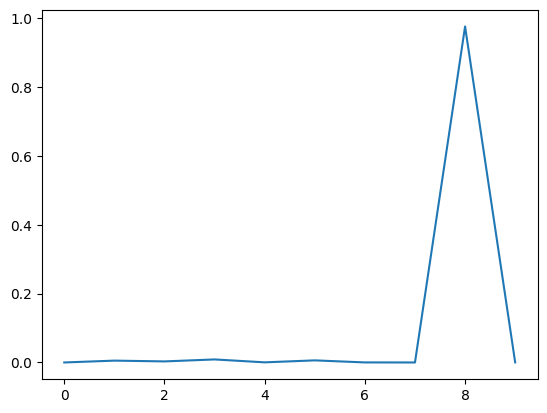

In [29]:
PP = clf.predict_proba(P)
plt.plot(PP[0])
print(f'O valor predito pela rede é: {VP[0]}')